# Music Popularity Prediction: A Comprehensive Analysis Using KNN and Logistic Regression

## Notebook Setup

In [82]:
# imports
import numpy as np
import matplotlib.pyplot as plt
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
import seaborn as sns
import pandas as pd
import sklearn as sk

# styling additions
from IPython.display import HTML
style = '''
    <style>
        div.info{
            padding: 15px; 
            border: 1px solid transparent; 
            border-left: 5px solid #dfb5b4; 
            border-color: transparent; 
            margin-bottom: 10px; 
            border-radius: 4px; 
            background-color: #fcf8e3; 
            border-color: #faebcc;
        }
        hr{
            border: 1px solid;
            border-radius: 5px;
        }
    </style>'''
HTML(style)

# Initial Preparation of Data Set

In [83]:
df = pd.read_csv('song_data_orig.csv')
df.columns

Index(['song_name', 'song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence'],
      dtype='object')

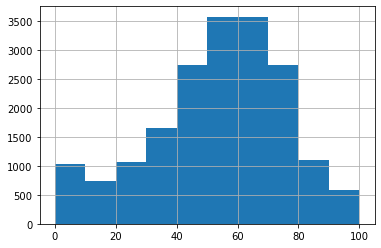

In [84]:
df['song_popularity'].hist();

In [85]:
df['is_pop'] = (df['song_popularity'] >= 80).values.astype('int') # Making this a "class label" called `is_pop` using a threshold value of 80:

In [86]:
df.query('is_pop == 1')

song_name  song_popularity  \
5                              Bring Me To Life               80   
6                                   Last Resort               81   
8                                Mr. Brightside               80   
9                                   Sex on Fire               81   
13                                   Can't Stop               81   
...                                         ...              ...   
18671             Tie Me Down (with Elley Duhé)               84   
18697  Magic In The Hamptons (feat. Lil Yachty)               85   
18702                                      Body               86   
18704                         If You're Over Me               81   
18734                  Love Lies (with Normani)               89   

       song_duration_ms  acousticness  danceability  energy  instrumentalness  \
5                235893      0.008950         0.316   0.945          0.000002   
6                199893      0.000504         0.581   0.887          0.001110   
8                222586      0.001080         0.330   0.936          0.000000   
9                203346      0.001720         0.542   0.905          0.010400   
13               269000      0.017900         0.618   0.938          0.000000   
...                 ...           ...           ...     ...               ...   
18671            218295      0.135000         0.548   0.839          0.000000   
18697            164640      0.660000         0.769   0.479          0.000000   
18702            163216      0.047600         0.752   0.764          0.000094   
18704            189000      0.061500         0.647   0.853          0.000000   
18734            201707      0.095600         0.708   0.648          0.000000   

       key  liveness  loudness  audio_mode  speechiness    tempo  \
5        4    0.3960    -3.169           0       0.1240  189.931   
6        4    0.2680    -3.659           0       0.0624   90.578   
8        1    0.0926    -3.660           1       0.0917  148.112   
9        9    0.1360    -5.653           1       0.0540  153.398   
13       9    0.1670    -3.442           1       0.0456   91.455   
...    ...       ...       ...         ...          ...      ...   
18671    6    0.1020    -2.371           1       0.0644   98.932   
18697    1    0.0914    -5.339           1       0.0385   96.051   
18702    1    0.0543    -4.399           1       0.0380  121.958   
18704    8    0.0620    -4.516           1       0.0904  103.846   
18734    6    0.1340    -5.626           1       0.0449  143.955   

       time_signature  audio_valence  is_pop  
5                   4          0.320       1  
6                   4          0.724       1  
8                   4          0.234       1  
9                   4          0.374       1  
13                  4          0.875       1  
...               ...            ...     ...  
18671               4          0.314       1  
18697               4          0.803       1  
18702               4          0.582       1  
18704               4          0.618       1  
18734               4          0.338       1  

[1701 rows x 16 columns]

In [87]:
df = df.drop('song_popularity',axis=1)
df.columns

Index(['song_name', 'song_duration_ms', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'key', 'liveness', 'loudness',
       'audio_mode', 'speechiness', 'tempo', 'time_signature', 'audio_valence',
       'is_pop'],
      dtype='object')

# Exploratory Data Analysis (EDA)


In [88]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets

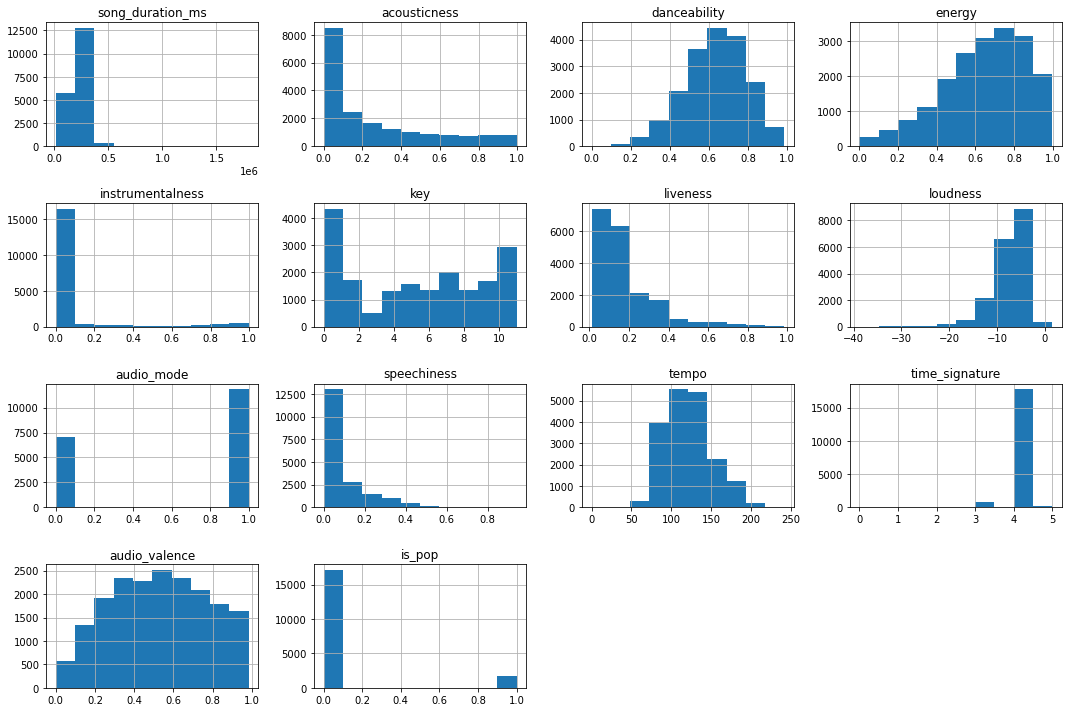

In [89]:
df.hist(figsize=(15, 10))
plt.tight_layout()

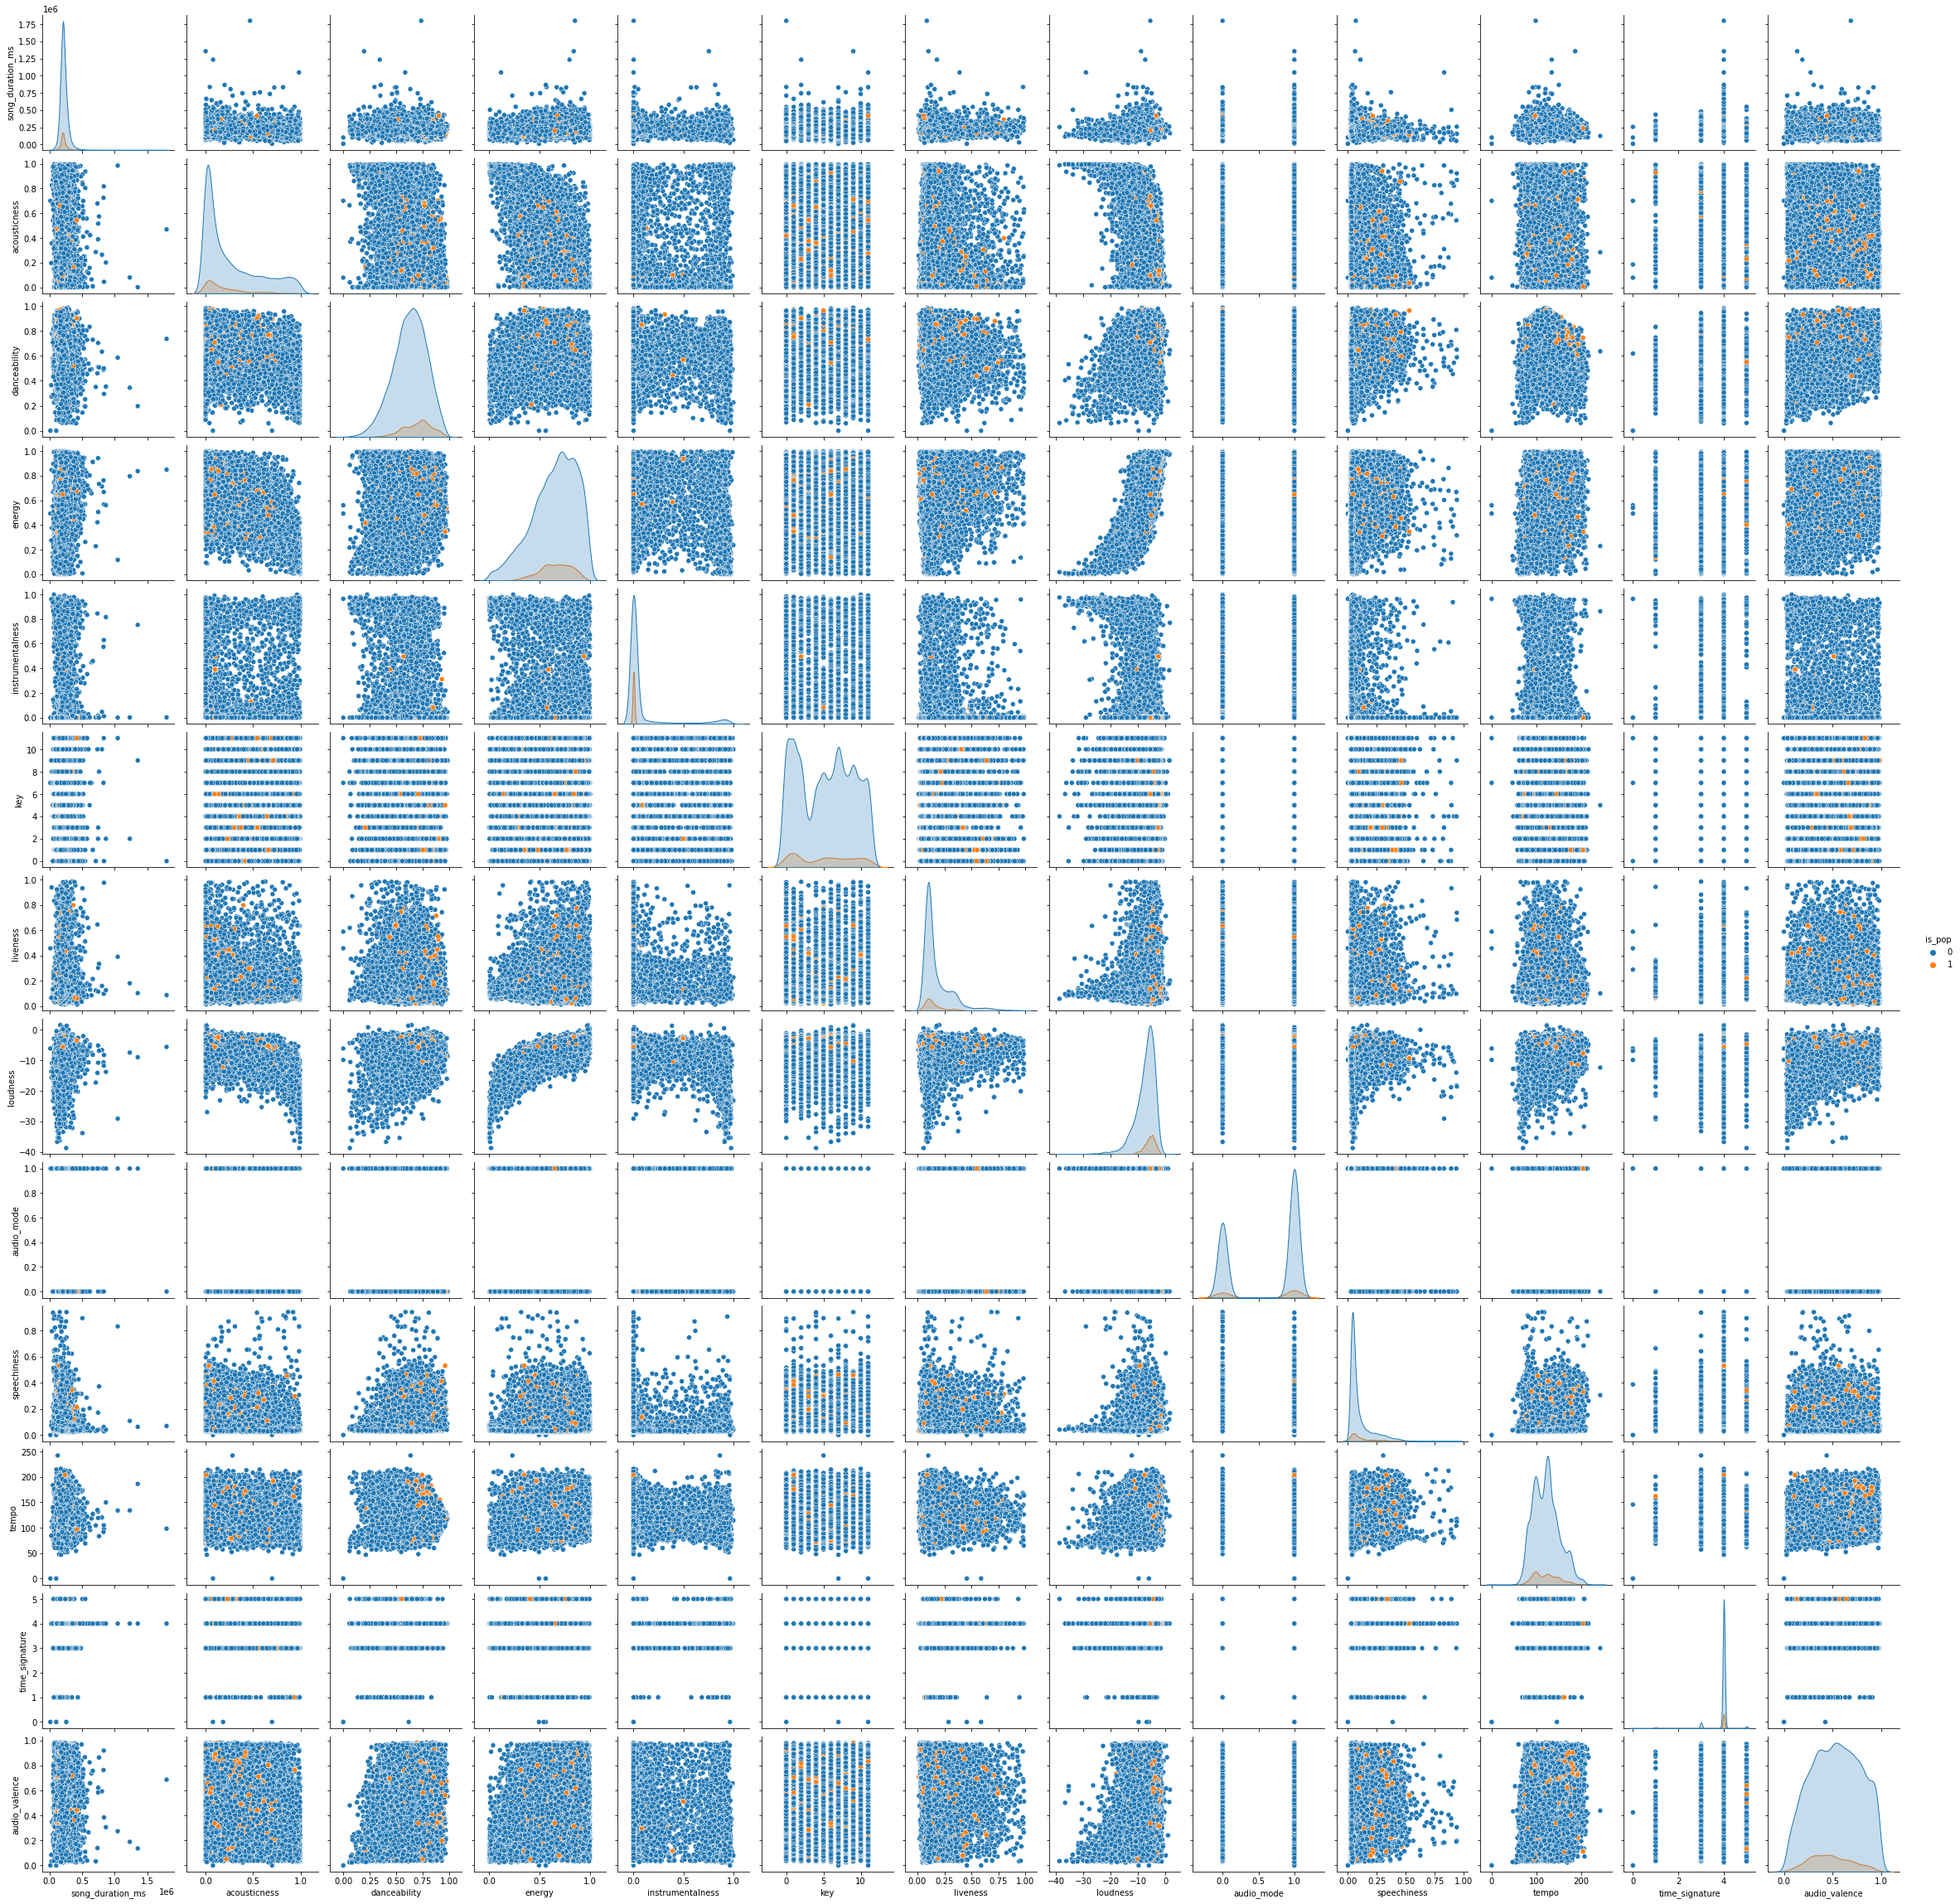

In [90]:
sns.pairplot(df, hue='is_pop')
plt.show()

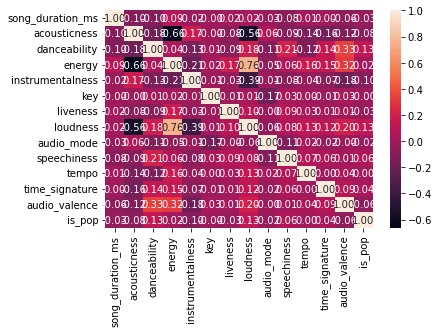

In [91]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

Some observations:

---

In the diagonal in the scatterplots, we see that certain features are more prominent than other features, especially when considering whether the song is a pop song or not. Overall, it is clear that most of the songs in this dataset are not pop songs. However, we can see that certain features tend to have more pop songs than others. These include danceability, energy, key, loudness, liveness, audio valence, and tempo. From the scatterplot, we can then see which combination of features have more songs that are considered pop. 

The skew of the features from both the diagonal of the scatterplot and the historgrams are interesting. Certain features such as energy and danceability have more of a normal distribution among all of the songs, while others such as loudness is heavily skewed to one side. 

The correlation matrix depicts which features are most related to each other, which loudness and energy having the most correlation. Loudness and acousticness has the least. is_pop has somewhat similar correlation with most of the variables with danceability and loudness having higher correlations. 

---

# Further Dataset Preparation and Research Question

## Research Question and Plan: Can loudness and danceability predict the variable is_pop (i.e. whether a sing is a pop song or not)?

I want to use these variables because (1) they have a high correlation to each other, (2) they have a high correlation to is_pop, and (3) there is a realtively high proportion of is_pop in those variables' combined scatterplots. As such, I am going to prepare my dataset by narrowing it down to just these two variables to predict is_pop.

After extracting those two features, I will create a test set and a train set to prepare for the machine learning models that I will evaluate later. 

I will also standardized my extracted features' distributions because their distributions are not entirely normal and are skewed differently from each other. 

---

In [92]:
features = df[['loudness', 'danceability']]
target = df['is_pop']

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 80% of the data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Feature scaling
# I decided to use StandardScaler instead of just scale for standardization because I am splitting the data into two datasets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Machine Learning Models


## Model 1 - KNN

I chose this model because it allows me to quickly see how accurate the model is, especially considering the skew and imbalance of the dataset with regards to the low amount of pop songs compared to other songs. As such, I can more precisely and accurately predict whether a song is a pop song or not based on my selected features (loudness and danceability). I chose my k-values (my hyper-parameters) to be a range of values from 5 to 45 to see how the value of K impacts the model's accuracy. A value that is too low could lead to overfitting due to the model being too sensitive and a value that is too high could lead to underfitting due to the model being to generalized. As such, a range of k-values for the hyperparameter is perfect to test out which values are better than other values. I am going to use an ROC and AUC to evaluate the regression further. The ROC allows me to see the ability of my model to correctly classify a song as pop or not while the AUC gives me a singular value for the ROC – slightly simplifying my analysis. 

In [96]:
from matplotlib.colors import ListedColormap
def plot_decision_boundary(model, X, y, scale=1):
    h=0.5
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h*scale))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    cmap = sns.palettes.color_palette('muted',as_cmap=True)
    cmap_light = ListedColormap(cmap[:2])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light,alpha=0.5);
    # Plot also the training points
    ax = sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=y,
        alpha=1.0,
        edgecolor="black",
        palette='muted'
    )
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f'KNN: K={n_neighbors} and Accuracy: {model.score(X, y)*100:.2f}%');
    plt.xlabel(['loudness']);
    plt.ylabel(['danceabilty']);
    handles,labels = ax.get_legend_handles_labels()
    ax.legend(handles, ['is_pop'])

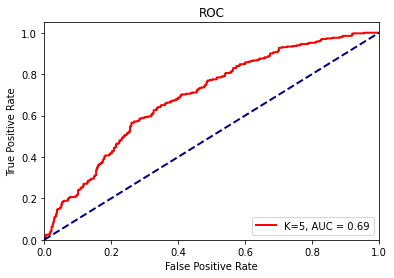

Accuracy for k=5: 92.75%


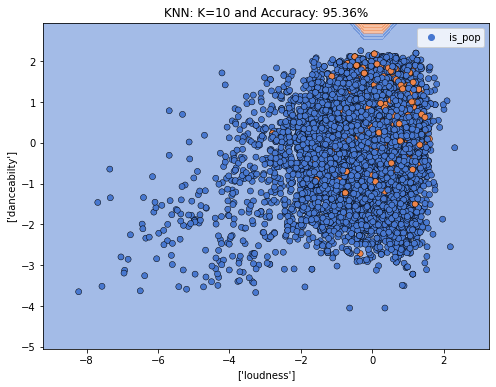

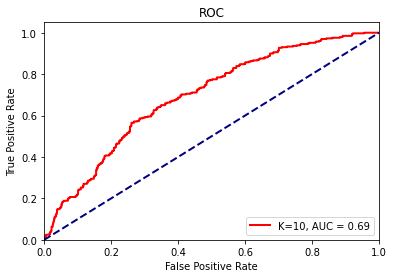

Accuracy for k=10: 92.20%


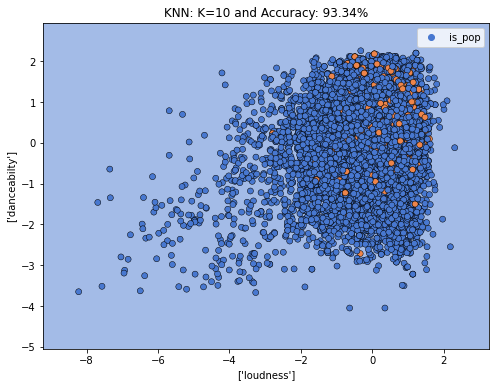

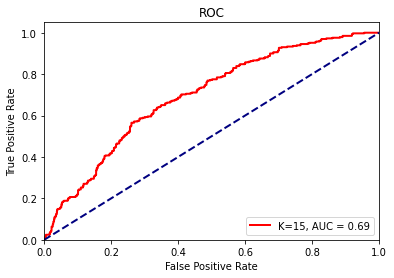

Accuracy for k=15: 91.53%


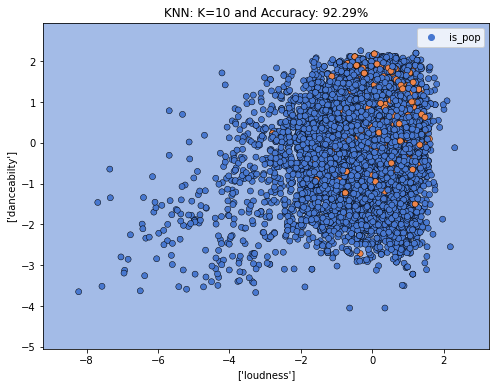

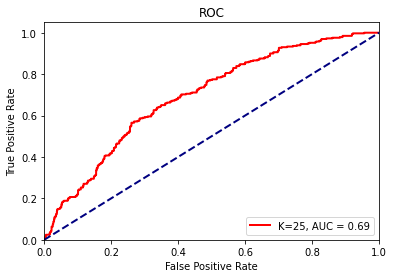

Accuracy for k=25: 91.48%


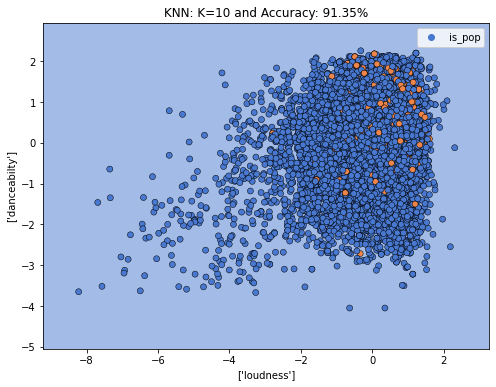

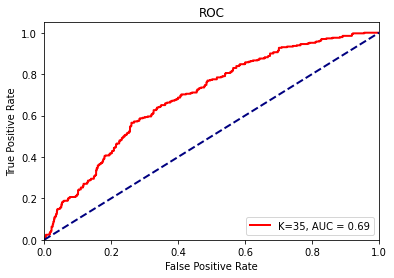

Accuracy for k=35: 91.27%


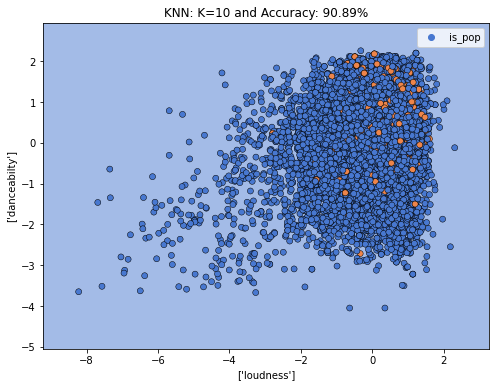

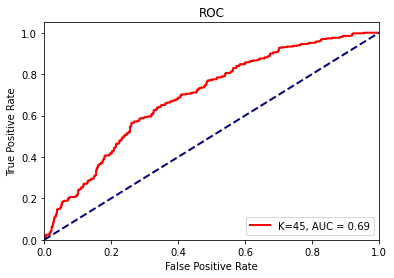

Accuracy for k=45: 91.24%


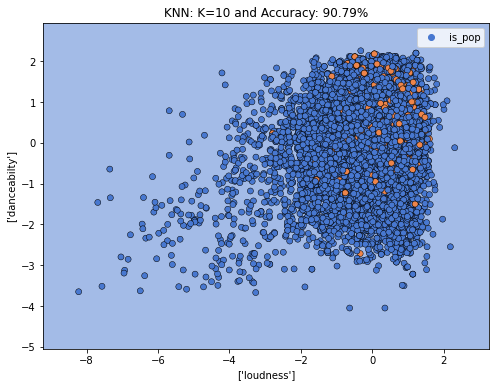

In [97]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

k_values = (5, 10, 15, 25, 35, 45)

accuracy_scores = {}

roc_auc_scores = {}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    roc_auc_scores[k] = roc_auc
    
    plt.figure()
    plt.plot(fpr, tpr, color='red', lw=2, label=f'K={k}, AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.show()
    
    accuracy = knn.score(X_test_scaled, y_test) * 100 
    accuracy_scores[k] = accuracy
    print(f"Accuracy for k={k}: {accuracy:.2f}%")

    plot_decision_boundary(knn, X_train_scaled, y_train)

## Model 2 - Logistic Regression

I chose this model because it allows me to also quickly see the accuracy. Additionally, logistic regressions are very helpful with binary datasets – which works out since I am only looking at the danceability and loudness features. Logistic regressions also include looking at the probability, which is very helpful in determining whether my selected features would predict the is_pop variable. I am also going to use an ROC and AUC to evaluate the regression further. The ROC allows me to see the ability of my model to correctly classify a song as pop or not while the AUC gives me a singular value for the ROC – slightly simplifying my analysis. 

In [98]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)
print(y_pred_log_reg)

acc_log_reg = np.mean(y_test==y_pred_log_reg)
acc_log_reg

print(f"Accuracy:")
print(acc_log_reg * 100)

[0 0 0 ... 0 0 0]
Accuracy:
91.26625962304222


AUC: 0.69


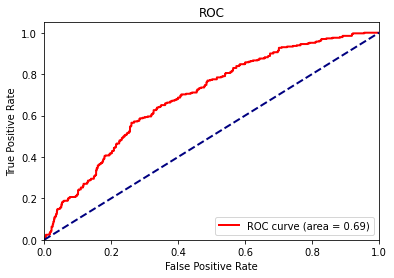

In [99]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

y_scores = log_reg.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_scores)

roc_auc = auc(fpr, tpr)

print(f"AUC: {roc_auc:.2f}")

plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

# Comparison of Models and Final Evaluation

## Confusion Matrixes

---

In [100]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

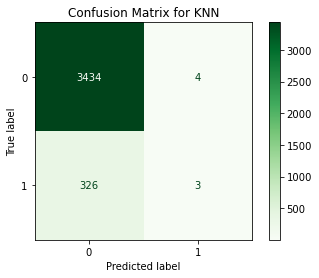

In [101]:
#KNN confusion matrix
y_pred_knn = knn.predict(X_test_scaled) 
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp.plot(cmap=plt.cm.Greens)
plt.title('Confusion Matrix for KNN')
plt.show()

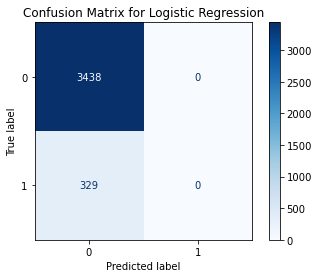

In [102]:
#Logistic Regression confusion matrix
y_pred_log_reg = log_reg.predict(X_test_scaled)
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

Individually, both of the models performed pretty well with high scores of accuracy. The KNN model tested 6 different values of k (5, 10, 15, 25, 35, 45) and we found that lower values of k led to a higher accuracy score. As such the most accurate version of the KNN model was the version that had a k-value of 1 which led to an accuracy value of 92.75%. The ROC plot and the AUC value (0.69) of the KNN model showcases that this model is is more accurate than random guessing and is moderately good at predicting whether a song is a pop song or not. On the other hand, the logistic regression model had an accuracy value of 91.27%. When we look at the ROC plot and the AUC value (0.69) of the logistic regression model, we can see that this model is more accurate than random guessing and is moderately good at predicting whether a song is a pop song or not. 

As the ROC plots, AUC values, and best accuracy values give us similar results, we can turn to confusion matrixes to compare these two models. Looking at the confusion matrixes, we can see that the KNN model had some false positives and negatives while the Logistic Regression model did not have any false positives or negatives. This makes me inclined to think that the Logistic Regression model is better at predicting whether a song is a pop song or not when compared to a KNN model. 

## Final Evaluation

Based on the performance of both models, it is evident that loudness and danceability are effective predictors of a song's popularity. The high accuracy scores of both the KNN and Logistic Regression models, alongside the moderate AUC values, indicate that these features are significant in determining whether a song is classified as popular. Despite the slight differences in model performance, with Logistic Regression showing no false positives or negatives and KNN achieving the highest accuracy, both models consistently demonstrated the predictive power of loudness and danceability. Therefore, it can be concluded that these features play a crucial role in influencing a song's popularity, making them valuable indicators for predicting whether a song will be a pop hit.

---

---